In [1]:
#import delle librerie che vado ad utilizzare
import pandas as pd
import humanize
import matplotlib.pyplot as plt
#import del csv con riferimento relativo per permettere di leggere il file dalla stessa cartella del notebookfile_path = "owid-covid-data.csv"
file_path = "owid-covid-data.csv"
covid = pd.read_csv(file_path, low_memory=False)

In [2]:
#dimensioni del dataset
covid.shape

(376985, 67)

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376985 entries, 0 to 376984
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    376985 non-null  object 
 1   continent                                   358926 non-null  object 
 2   location                                    376985 non-null  object 
 3   date                                        376985 non-null  object 
 4   total_cases                                 338085 non-null  float64
 5   new_cases                                   366116 non-null  float64
 6   new_cases_smoothed                          364886 non-null  float64
 7   total_deaths                                316113 non-null  float64
 8   new_deaths                                  366124 non-null  float64
 9   new_deaths_smoothed                         364894 non-null  float64
 

In [4]:
'''casi totali per continente:
   utilizzo unique per vedere tutti i valori presenti nella colonna. Riesco a vedere che sono presenti valori vuoti (nan)
   Già da .info i valori non-null risultano inferiori al totale delle righe di .shape'''
covid.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [5]:
'''nell'esericizo viene richiesto di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente (nan)
   il metodo groupby ha come implicita questa funzione, se non si specifica diversamente è come se fosse scritto così: 
   groupby('continent', dropna=True) quindi non va fatto altro.
   Come detto a lezione, ho utilizzato la colonna new_cases perchè la colonna total_cases è incrementale, quindi con la somma dava dei valori errati.
   In ogni caso avrei potuto fare la ricerca su total_cases con la funzione .max'''
tot_continenti = covid.groupby('continent')['new_cases'].sum()
print('totale di casi per ogni', tot_continenti)

totale di casi per ogni continent
Africa            13136517.0
Asia             301391174.0
Europe           252013370.0
North America    124526003.0
Oceania           14741735.0
South America     68752780.0
Name: new_cases, dtype: float64


In [6]:
'''per migliorare la visualizzazione del dato ho utilizzato la funzione apply che mi permette di utilizzare la libreria humanize: 
   vengono inserite le virgole come separatori delle migliaia'''
tot_continenti_df=pd.DataFrame(tot_continenti.apply(humanize.intcomma))
tot_continenti_df

new_cases
continent                   
Africa          13,136,517.0
Asia           301,391,174.0
Europe         252,013,370.0
North America  124,526,003.0
Oceania         14,741,735.0
South America   68,752,780.0

In [7]:
#3 Filtro il dataset per Asia ed Europa
Asia= covid[covid.continent=='Asia']
Europe= covid[covid.continent=='Europe']

In [8]:
'''descrittori statistici
   ho utilizzato la funzione describe dove ho selezionato solo le misure richieste dalla traccia,
   di nuovo ho utilizzato .apply, humanize, per una migliore visualizzazione del dato
   la funzione round() in questo caso mi permette di visualizzare solo due numeri dopo la virgola'''

descrittori_Tot_nc = covid.groupby('continent')['new_cases'].describe()[['min', 'max', 'mean']].round(2)
#continuo ad usare la groupby per farmi un'idea generale sui dati

descrittori_mondo= covid['new_cases'].describe()[['min', 'max', 'mean']].round(2).apply(humanize.intcomma)
descrittori_Asia = Asia['new_cases'].describe()[['min', 'max', 'mean']].round(2).apply(humanize.intcomma)
descrittori_Europe = Europe['new_cases'].describe()[['min', 'max', 'mean']].round(2).apply(humanize.intcomma)

print(descrittori_Tot_nc)
print("\nDescrittori per tutti i continenti:")
print(descrittori_mondo)
print("\nDescrittori per il continente Asia:")
print(descrittori_Asia)
print("\nDescrittori per il continente Europe:")
print(descrittori_Europe)

               min         max     mean
continent                              
Africa         0.0    162987.0   154.48
Asia           0.0  40475477.0  4298.16
Europe         0.0   2417043.0  3339.96
North America  0.0   5650933.0  2044.49
Oceania        0.0    588813.0   411.72
South America  0.0   1283024.0  3291.65

Descrittori per tutti i continenti:
min              0.0
max     44,236,227.0
mean        8,965.88
Name: new_cases, dtype: object

Descrittori per il continente Asia:
min              0.0
max     40,475,477.0
mean        4,298.16
Name: new_cases, dtype: object

Descrittori per il continente Europe:
min             0.0
max     2,417,043.0
mean       3,339.96
Name: new_cases, dtype: object


In [9]:
# Calcola i valori percentuali rispetto alla somma totale
new_cases_Tot = covid['new_cases'].sum()
'''dai risultati che ottenevo mi risultavano delle % molto basse per i continenti selezionati, 
   quindi ho voluto inserire un groupby con fillna dove rinomino le celle vuote con nulli e risulta che detengono il 76% dei nuovi casi'''
casi_tot_continente_perc = covid.groupby(covid.continent.fillna('nulli'))['new_cases'].sum()/ new_cases_Tot * 100
perc_Asia = Asia['new_cases'].sum() / new_cases_Tot
perc_Europe = Europe['new_cases'].sum() / new_cases_Tot 
print("\nPercentuali rispetto alla somma totale per tutti i continenti + nulli:")
print(casi_tot_continente_perc)
print("\nPercentuali rispetto alla somma totale per il continente Asia:")
print(f'{perc_Asia:.2%}')
print("\nPercentuali rispetto alla somma totale per il continente Europe:")
print(f'{perc_Europe:.2%}')


Percentuali rispetto alla somma totale per tutti i continenti + nulli:
continent
Africa            0.400192
Asia              9.181608
Europe            7.677358
North America     3.793571
Oceania           0.449094
South America     2.094491
nulli            76.403686
Name: new_cases, dtype: float64

Percentuali rispetto alla somma totale per il continente Asia:
9.18%

Percentuali rispetto alla somma totale per il continente Europe:
7.68%


In [10]:
'''la funzione può essere utilizzata per rendere tutti i passaggi relativi al punto 3 fatti fin'ora automatici,
   dando la possibilità all'utente di inserire in input un continente a scelta ed avviare l'analisi.
   Quindi ho sostituito tutti i valori relativi ad Asia e Europe rispettivamente con continente1 e continente2 che sono ora valori di input.
   Prima di avviare la funzione, tramite if ho inserito la verifica degli input, in cui il print avvisa se non sono corretti'''

def confronti_casi_tot(covid, continente1, continente2): 
    if continente1 not in covid['continent'].unique() or continente2 not in covid['continent'].unique():
        print("Prova di nuovo, hai inserito i riferimenti sbagliati.")
    else:
        continente1_data = covid[covid.continent == continente1]
        continente2_data = covid[covid.continent == continente2]
    
        descrittori_mondo = covid['new_cases'].describe()[['min', 'max', 'mean']]
        descrittori_continente1 = continente1_data['new_cases'].describe()[['min', 'max', 'mean']]
        descrittori_continente2 = continente2_data['new_cases'].describe()[['min', 'max', 'mean']]

        #creo la seguente variabile per ricavare la percentuale
        new_cases_tot = covid['new_cases'].sum()
        #inserisco la percentuale mondo per non lasciare il valore vuoto in visualizzazione
        perc_mondo = new_cases_tot / new_cases_tot
        perc_continente1 = continente1_data['new_cases'].sum() / new_cases_tot
        perc_continente2 = continente2_data['new_cases'].sum() / new_cases_tot 
    
        # Creo il DataFrame con i risultati
        risultati = pd.DataFrame({
            'Continente': ['mondo', 'mondo', 'mondo', 'mondo', continente1, continente1, continente1, continente1, continente2, continente2, continente2, continente2],
            'Descrittore': ['Minimo', 'Massimo', 'Media', 'Percentuale'] * 3,
            'Valori': [
                humanize.intcomma(descrittori_mondo['min'].round(2)),
                humanize.intcomma(descrittori_mondo['max'].round(2)),
                humanize.intcomma(descrittori_mondo['mean'].round(2)),
                humanize.intcomma((perc_mondo * 100).round(2)),
                humanize.intcomma(descrittori_continente1['min'].round(2)),
                humanize.intcomma(descrittori_continente1['max'].round(2)),
                humanize.intcomma(descrittori_continente1['mean'].round(2)),
                humanize.intcomma((perc_continente1 * 100).round(2)),
                humanize.intcomma(descrittori_continente2['min'].round(2)),
                humanize.intcomma(descrittori_continente2['max'].round(2)),
                humanize.intcomma(descrittori_continente2['mean'].round(2)),
                humanize.intcomma((perc_continente2 * 100).round(2))]})

        return risultati

continente1 = input("Inserisci il primo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")
continente2 = input("Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")

df_risultati_casi_tot = confronti_casi_tot(covid, continente1, continente2)
print(df_risultati_casi_tot)

Inserisci il primo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: Asia
Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: Europe


   Continente  Descrittore        Valori
0       mondo       Minimo           0.0
1       mondo      Massimo  44,236,227.0
2       mondo        Media      8,965.88
3       mondo  Percentuale         100.0
4        Asia       Minimo           0.0
5        Asia      Massimo  40,475,477.0
6        Asia        Media      4,298.16
7        Asia  Percentuale          9.18
8      Europe       Minimo           0.0
9      Europe      Massimo   2,417,043.0
10     Europe        Media      3,339.96
11     Europe  Percentuale          7.68


In [11]:
df_risultati_casi_tot

Continente  Descrittore        Valori
0       mondo       Minimo           0.0
1       mondo      Massimo  44,236,227.0
2       mondo        Media      8,965.88
3       mondo  Percentuale         100.0
4        Asia       Minimo           0.0
5        Asia      Massimo  40,475,477.0
6        Asia        Media      4,298.16
7        Asia  Percentuale          9.18
8      Europe       Minimo           0.0
9      Europe      Massimo   2,417,043.0
10     Europe        Media      3,339.96
11     Europe  Percentuale          7.68

In [12]:
#4
descrittori_Tot_nv = covid.groupby('continent')['new_vaccinations'].describe()[['min', 'max', 'mean']].round(2)
#continuo ad usare la groupby per farmi un'idea generale sui dati
descrittori_Tot_nv

min         max       mean
continent                                
Africa         0.0   1866822.0   42203.19
Asia           0.0  24741000.0  484311.81
Europe         0.0   2389472.0   55137.27
North America  0.0   7246123.0  161899.77
Oceania        1.0    351226.0   55957.98
South America  1.0   3976605.0  141700.11

In [13]:
#4 Analisi su numero di vaccinazioni totali
'''Per utilizzare un'altra funzione, stavolta ho usato il ciclo for
   Ho sempre inserito il print in caso di errore di digit
   Nel for non considerava però 'mondo' perchè va ad analizzare ogni singolo elemento di un elenco, quindi ho dovuto creare un if in più per avere
   la stessa visualizzazione dell'altra funzione'''
def confronti_vaccinazioni_tot(covid, continente1, continente2):
    if continente1 not in covid['continent'].unique() or continente2 not in covid['continent'].unique():
        print("Prova di nuovo, hai inserito i riferimenti sbagliati.")
    else:
        continenti_interesse = ['mondo',continente1, continente2]
        risultati = []

        for continente in continenti_interesse:
            if continente == 'mondo':
                continente_data = covid
            else:
                continente_data = covid[covid.continent == continente]

            descrittori = continente_data['new_vaccinations'].describe()[['min', 'max', 'mean']]

            perc_continente = continente_data['new_vaccinations'].sum() / covid['new_vaccinations'].sum()

            risultati.append({
                'Continente': continente,
                'Descrittore': 'Minimo',
                'Valori': humanize.intcomma(descrittori['min'].round(2))})
            risultati.append({
                'Continente': continente,
                'Descrittore': 'Massimo',
                'Valori': humanize.intcomma(descrittori['max'].round(2))})
            risultati.append({
                'Continente': continente,
                'Descrittore': 'Media',
                'Valori': humanize.intcomma(descrittori['mean'].round(2))})
            risultati.append({
                'Continente': continente,
                'Descrittore': 'Percentuale',
                'Valori': humanize.intcomma((perc_continente * 100).round(2))})

        df_risultati = pd.DataFrame(risultati)

        return df_risultati

# Chiamata alla funzione per confrontare le vaccinazioni totali tra due continenti
continente1_vaccinazioni = input("Inserisci il primo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")
continente2_vaccinazioni = input("Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")

df_risultati_vaccinazioni_tot = confronti_vaccinazioni_tot(covid, continente1_vaccinazioni, continente2_vaccinazioni)
print(df_risultati_vaccinazioni_tot)


Inserisci il primo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: Asia
Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: Europe


   Continente  Descrittore        Valori
0       mondo       Minimo           0.0
1       mondo      Massimo  49,673,196.0
2       mondo        Media    766,700.82
3       mondo  Percentuale         100.0
4        Asia       Minimo           0.0
5        Asia      Massimo  24,741,000.0
6        Asia        Media    484,311.81
7        Asia  Percentuale         14.38
8      Europe       Minimo           0.0
9      Europe      Massimo   2,389,472.0
10     Europe        Media     55,137.27
11     Europe  Percentuale          2.41


In [14]:
df_risultati_vaccinazioni_tot

Continente  Descrittore        Valori
0       mondo       Minimo           0.0
1       mondo      Massimo  49,673,196.0
2       mondo        Media    766,700.82
3       mondo  Percentuale         100.0
4        Asia       Minimo           0.0
5        Asia      Massimo  24,741,000.0
6        Asia        Media    484,311.81
7        Asia  Percentuale         14.38
8      Europe       Minimo           0.0
9      Europe      Massimo   2,389,472.0
10     Europe        Media     55,137.27
11     Europe  Percentuale          2.41

In [15]:
'''Con la funzione merge di pandas ho unito i dataframe risultanti dalle 2 funzioni per ottenere un'unica visualizzazione.
   Il merge funziona a patto che nelle due funzioni siano inseriti i due stessi input.
   suffixes permette di continuare a distinguere le colonne diverse dell'uno e dell'altro'''

df_unione = pd.merge(df_risultati_casi_tot, df_risultati_vaccinazioni_tot, on=['Continente', 'Descrittore'], suffixes=('_casi', '_vaccinazioni'))
df_unione

Continente  Descrittore   Valori_casi Valori_vaccinazioni
0       mondo       Minimo           0.0                 0.0
1       mondo      Massimo  44,236,227.0        49,673,196.0
2       mondo        Media      8,965.88          766,700.82
3       mondo  Percentuale         100.0               100.0
4        Asia       Minimo           0.0                 0.0
5        Asia      Massimo  40,475,477.0        24,741,000.0
6        Asia        Media      4,298.16          484,311.81
7        Asia  Percentuale          9.18               14.38
8      Europe       Minimo           0.0                 0.0
9      Europe      Massimo   2,417,043.0         2,389,472.0
10     Europe        Media      3,339.96           55,137.27
11     Europe  Percentuale          7.68                2.41

In [16]:
df_unione['Valori_casi'].dtype

dtype('O')

In [17]:
'''Visto che le nuove colonne sono di tipo object, con pd.to_numeric converto le colonne 'Valori_casi' e 'Valori_Vaccinazioni' in numerico, 
   In seguito creo una colonna aggiuntiva nel dataframe dove calcolo la differenza tra Casi e Vaccinazioni'''
df_unione['Valori_casi'] = df_unione['Valori_casi'].str.replace(',', '').astype(float)
df_unione['Valori_vaccinazioni'] = df_unione['Valori_vaccinazioni'].str.replace(',', '').astype(float)

In [18]:
df_unione['Differenza'] = df_unione['Valori_casi'] - df_unione['Valori_vaccinazioni']


In [19]:
df_unione

Continente  Descrittore  Valori_casi  Valori_vaccinazioni   Differenza
0       mondo       Minimo         0.00                 0.00         0.00
1       mondo      Massimo  44236227.00          49673196.00  -5436969.00
2       mondo        Media      8965.88            766700.82   -757734.94
3       mondo  Percentuale       100.00               100.00         0.00
4        Asia       Minimo         0.00                 0.00         0.00
5        Asia      Massimo  40475477.00          24741000.00  15734477.00
6        Asia        Media      4298.16            484311.81   -480013.65
7        Asia  Percentuale         9.18                14.38        -5.20
8      Europe       Minimo         0.00                 0.00         0.00
9      Europe      Massimo   2417043.00           2389472.00     27571.00
10     Europe        Media      3339.96             55137.27    -51797.31
11     Europe  Percentuale         7.68                 2.41         5.27

In [20]:
#Aggiungo continente3 per visualizzare i dati da commentare nella richiesta 5

def confronti_casi_tot(covid, continente1, continente2, continente3): 
    if continente1 not in covid['continent'].unique() or continente2 not in covid['continent'].unique():
        print("Prova di nuovo, hai inserito i riferimenti sbagliati.")
    else:
        continente1_data = covid[covid.continent == continente1]
        continente2_data = covid[covid.continent == continente2]
        continente3_data = covid[covid.continent == continente3]
        
        descrittori_continente1 = continente1_data['new_cases'].describe()[['min', 'max', 'mean']]
        descrittori_continente2 = continente2_data['new_cases'].describe()[['min', 'max', 'mean']]
        descrittori_continente3 = continente3_data['new_cases'].describe()[['min', 'max', 'mean']]

        #creo la seguente variabile per ricavare la percentuale
        new_cases_tot = covid['new_cases'].sum()
        perc_continente1 = continente1_data['new_cases'].sum() / new_cases_tot
        perc_continente2 = continente2_data['new_cases'].sum() / new_cases_tot 
        perc_continente3 = continente3_data['new_cases'].sum() / new_cases_tot 
    
        # Creo il DataFrame con i risultati
        risultati = pd.DataFrame({
            'Continente': [continente1, continente1, continente1, continente1, continente2, continente2, continente2, continente2, 
                           continente3, continente3, continente3, continente3],
            'Descrittore': ['Minimo', 'Massimo', 'Media', 'Percentuale'] * 3,
            'Valori': [
                humanize.intcomma(descrittori_continente1['min'].round(2)),
                humanize.intcomma(descrittori_continente1['max'].round(2)),
                humanize.intcomma(descrittori_continente1['mean'].round(2)),
                humanize.intcomma((perc_continente1 * 100).round(2)),
                humanize.intcomma(descrittori_continente2['min'].round(2)),
                humanize.intcomma(descrittori_continente2['max'].round(2)),
                humanize.intcomma(descrittori_continente2['mean'].round(2)),
                humanize.intcomma((perc_continente2 * 100).round(2)),
                humanize.intcomma(descrittori_continente3['min'].round(2)),
                humanize.intcomma(descrittori_continente3['max'].round(2)),
                humanize.intcomma(descrittori_continente3['mean'].round(2)),
                humanize.intcomma((perc_continente3 * 100).round(2))]})

        return risultati

continente1 = input("Inserisci il primo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")
continente2 = input("Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")
continente3 = input("Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")

df_risultati_casi_tot5 = confronti_casi_tot(covid, continente1, continente2, continente3)
print(df_risultati_casi_tot5)

Inserisci il primo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: Oceania
Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: Europe
Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: South America


       Continente  Descrittore       Valori
0         Oceania       Minimo          0.0
1         Oceania      Massimo    588,813.0
2         Oceania        Media       411.72
3         Oceania  Percentuale         0.45
4          Europe       Minimo          0.0
5          Europe      Massimo  2,417,043.0
6          Europe        Media     3,339.96
7          Europe  Percentuale         7.68
8   South America       Minimo          0.0
9   South America      Massimo  1,283,024.0
10  South America        Media     3,291.65
11  South America  Percentuale         2.09


In [21]:
def confronti_vaccinazioni_tot(covid, continente1, continente2, continente3):
    if continente1 not in covid['continent'].unique() or continente2 not in covid['continent'].unique():
        print("Prova di nuovo, hai inserito i riferimenti sbagliati.")
    else:
        continenti_interesse = [continente1, continente2, continente3]
        risultati = []

        for continente in continenti_interesse:
            continente_data = covid[covid.continent == continente]

            descrittori = continente_data['new_vaccinations'].describe()[['min', 'max', 'mean']]

            perc_continente = continente_data['new_vaccinations'].sum() / covid['new_vaccinations'].sum()

            risultati.append({
                'Continente': continente,
                'Descrittore': 'Minimo',
                'Valori': humanize.intcomma(descrittori['min'].round(2))})
            risultati.append({
                'Continente': continente,
                'Descrittore': 'Massimo',
                'Valori': humanize.intcomma(descrittori['max'].round(2))})
            risultati.append({
                'Continente': continente,
                'Descrittore': 'Media',
                'Valori': humanize.intcomma(descrittori['mean'].round(2))})
            risultati.append({
                'Continente': continente,
                'Descrittore': 'Percentuale',
                'Valori': humanize.intcomma((perc_continente * 100).round(2))})

        df_risultati = pd.DataFrame(risultati)

        return df_risultati

# Chiamata alla funzione per confrontare le vaccinazioni totali tra due continenti
continente1_vaccinazioni = input("Inserisci il primo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")
continente2_vaccinazioni = input("Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")
continente3_vaccinazioni = input("Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America:")

df_risultati_vaccinazioni_tot5 = confronti_vaccinazioni_tot(covid, continente1_vaccinazioni, continente2_vaccinazioni, continente3_vaccinazioni)
print(df_risultati_vaccinazioni_tot5)

Inserisci il primo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: Oceania
Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: Europe
Inserisci il secondo tra i seguenti continenti Asia, Europe, Africa, Oceania, North America, South America: South America


       Continente  Descrittore       Valori
0         Oceania       Minimo          1.0
1         Oceania      Massimo    351,226.0
2         Oceania        Media    55,957.98
3         Oceania  Percentuale         0.14
4          Europe       Minimo          0.0
5          Europe      Massimo  2,389,472.0
6          Europe        Media    55,137.27
7          Europe  Percentuale         2.41
8   South America       Minimo          1.0
9   South America      Massimo  3,976,605.0
10  South America        Media   141,700.11
11  South America  Percentuale         1.61


In [22]:
df_unione5 = pd.merge(df_risultati_casi_tot5, df_risultati_vaccinazioni_tot5, on=['Continente', 'Descrittore'], suffixes=('_casi', '_vaccinazioni'))
df_unione5

Continente  Descrittore  Valori_casi Valori_vaccinazioni
0         Oceania       Minimo          0.0                 1.0
1         Oceania      Massimo    588,813.0           351,226.0
2         Oceania        Media       411.72           55,957.98
3         Oceania  Percentuale         0.45                0.14
4          Europe       Minimo          0.0                 0.0
5          Europe      Massimo  2,417,043.0         2,389,472.0
6          Europe        Media     3,339.96           55,137.27
7          Europe  Percentuale         7.68                2.41
8   South America       Minimo          0.0                 1.0
9   South America      Massimo  1,283,024.0         3,976,605.0
10  South America        Media     3,291.65          141,700.11
11  South America  Percentuale         2.09                1.61

In [23]:
print(df_unione5['Valori_casi'].dtype)

object


In [24]:
df_unione5['Valori_casi'] = df_unione5['Valori_casi'].str.replace(',', '').astype(float)
df_unione5['Valori_vaccinazioni'] = df_unione5['Valori_vaccinazioni'].str.replace(',', '').astype(float)

In [25]:
df_unione5['Differenza'] = df_unione5['Valori_casi'] - df_unione5['Valori_vaccinazioni']
df_unione5['Differenza_perc'] = df_unione5['Valori_casi'] / df_unione5['Valori_vaccinazioni']

In [26]:
df_unione5

Continente  Descrittore  Valori_casi  Valori_vaccinazioni  Differenza  \
0         Oceania       Minimo         0.00                 1.00       -1.00   
1         Oceania      Massimo    588813.00            351226.00   237587.00   
2         Oceania        Media       411.72             55957.98   -55546.26   
3         Oceania  Percentuale         0.45                 0.14        0.31   
4          Europe       Minimo         0.00                 0.00        0.00   
5          Europe      Massimo   2417043.00           2389472.00    27571.00   
6          Europe        Media      3339.96             55137.27   -51797.31   
7          Europe  Percentuale         7.68                 2.41        5.27   
8   South America       Minimo         0.00                 1.00       -1.00   
9   South America      Massimo   1283024.00           3976605.00 -2693581.00   
10  South America        Media      3291.65            141700.11  -138408.46   
11  South America  Percentuale         2.09                 1.61        0.48   

    Differenza_perc  
0          0.000000  
1          1.676450  
2          0.007358  
3          3.214286  
4               NaN  
5          1.011539  
6          0.060575  
7          3.186722  
8          0.000000  
9          0.322643  
10         0.023230  
11         1.298137

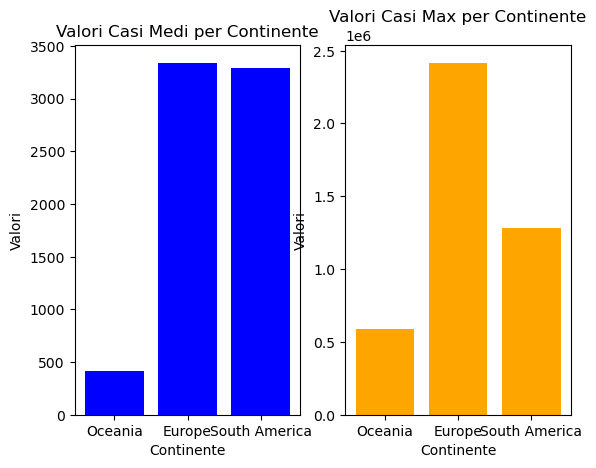

In [27]:
#Due Grafici che visualizzano casi covid in media e massimi per continente
df_media = df_unione5[df_unione5['Descrittore'] == 'Media']
continenti_media = df_media['Continente']
valori_media = df_media['Valori_casi']

#Grafico Media
plt.subplot(1, 2, 1)
plt.bar(continenti_media, valori_media, color='blue')
plt.xlabel('Continente')
plt.ylabel('Valori')
plt.title('Valori Casi Medi per Continente')

df_massimo = df_unione5[df_unione5['Descrittore'] == 'Massimo']
continenti_massimo = df_massimo['Continente']
valori_massimo = df_massimo['Valori_casi']

#Grafico Massimo
plt.subplot(1, 2, 2)
plt.bar(continenti_massimo, valori_massimo, color='orange')
plt.xlabel('Continente')
plt.ylabel('Valori')
plt.title('Valori Casi Max per Continente')

plt.show()


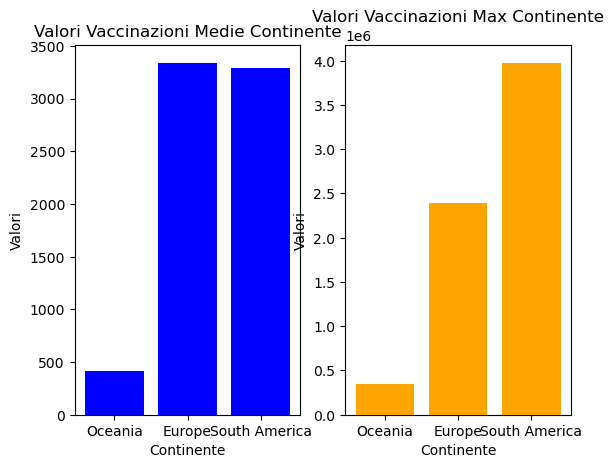

In [28]:
#Due Grafici che visualizzano vaccinazioni covid in media e massimi per continente
df_media_vacc = df_unione[df_unione['Descrittore'] == 'Media']

continenti_media_vacc = df_media_vacc['Continente']
valori_media_vacc = df_media_vacc['Valori_vaccinazioni']

# Grafico Media
plt.subplot(1, 2, 1)
plt.bar(continenti_media, valori_media, color='blue')
plt.xlabel('Continente')
plt.ylabel('Valori')
plt.title('Valori Vaccinazioni Medie Continente')

df_massimo_vacc = df_unione[df_unione['Descrittore'] == 'Massimo']
continenti_massimo = df_massimo['Continente']
valori_massimo = df_massimo['Valori_vaccinazioni']

# Grafico Max
plt.subplot(1, 2, 2)
plt.bar(continenti_massimo, valori_massimo, color='orange')
plt.xlabel('Continente')
plt.ylabel('Valori')
plt.title('Valori Vaccinazioni Max Continente')

plt.show()
